# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


# Data Cleaning

In [6]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Drop non-numeric and ID-related columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
# Encode Geography and Gender
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])


In [9]:
X = df.drop('Exited', axis=1)
y = df['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Exploratory Data Analysis

## Distribution of Target Variable

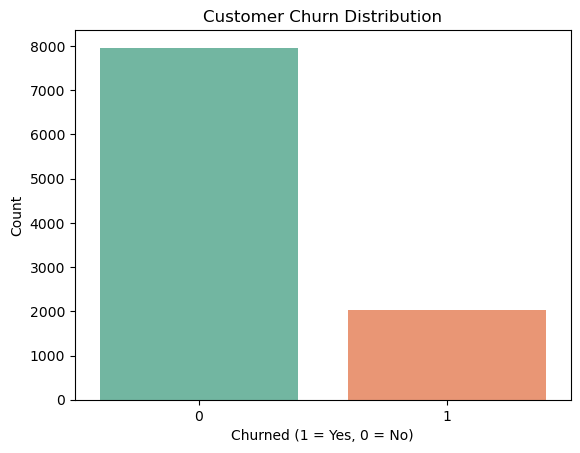

In [12]:
sns.countplot(x='Exited', data=df, hue='Exited', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churned (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

##  Gender Distribution

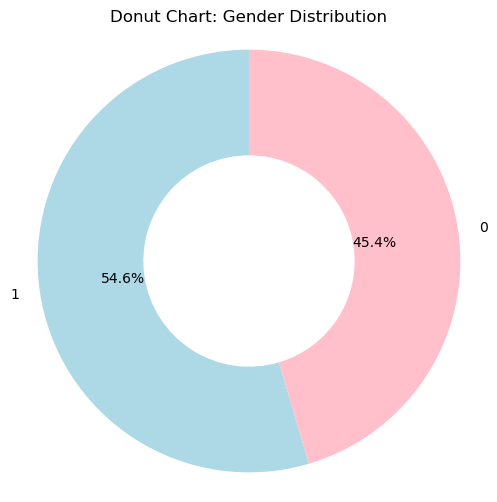

In [14]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, colors=['lightblue', 'pink'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title('Donut Chart: Gender Distribution')
plt.axis('equal')
plt.show()


## Geography vs Churn

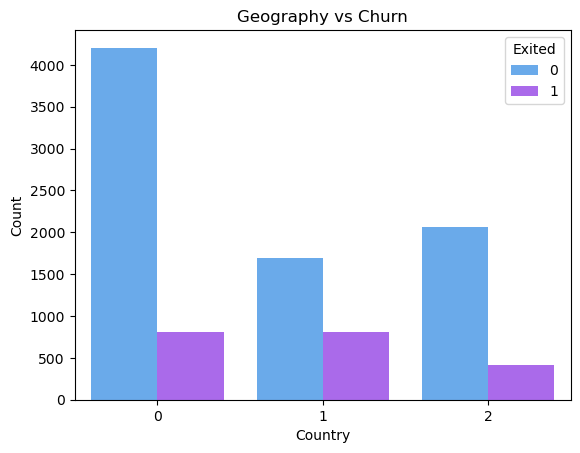

In [16]:
sns.countplot(x='Geography', hue='Exited', data=df, palette='cool')
plt.title('Geography vs Churn')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()


## Pie chart for churn

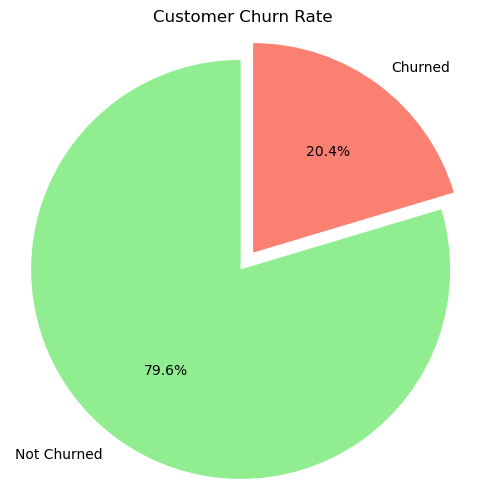

In [18]:
churn_counts = df['Exited'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()


## Scatter Plot 

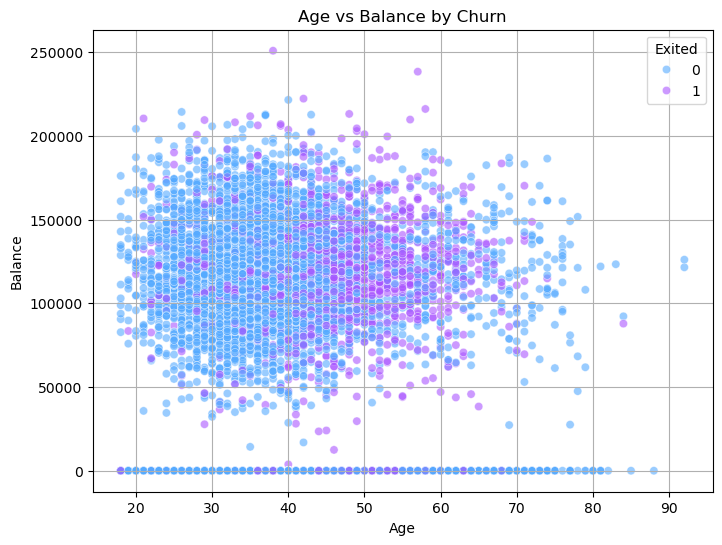

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='cool', alpha=0.6)
plt.title('Age vs Balance by Churn')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Exited')
plt.grid(True)
plt.show()


## Violin Plot

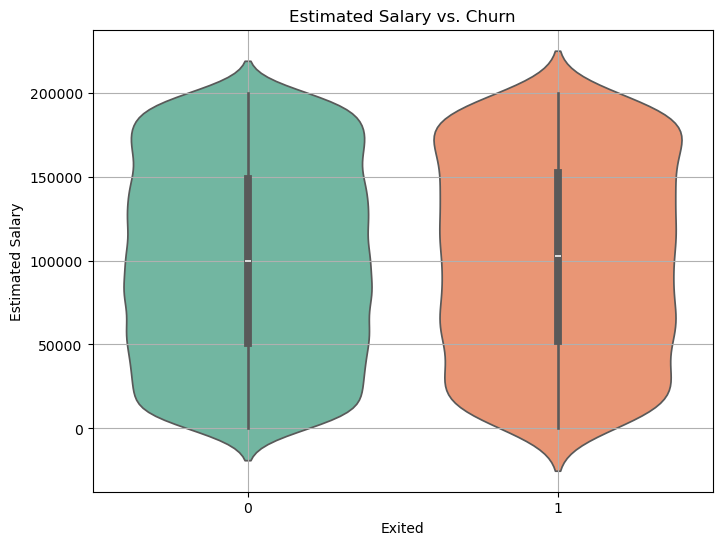

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', palette='Set2', legend=False)

plt.title('Estimated Salary vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()


## KDE Plot

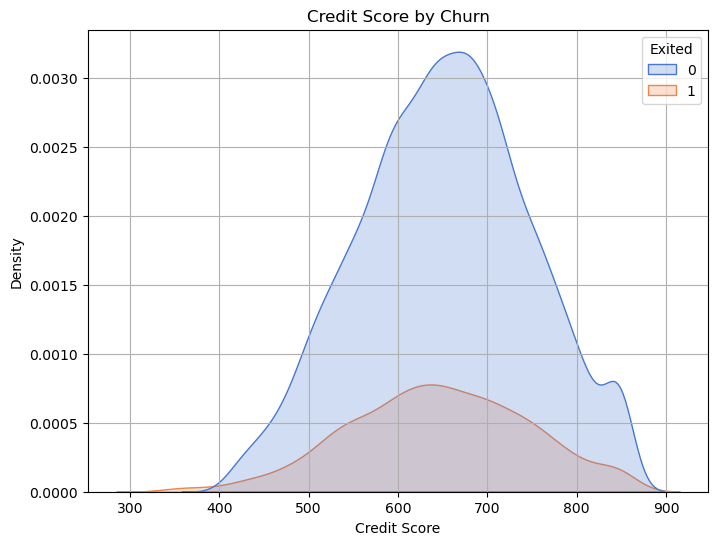

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='CreditScore', hue='Exited', fill=True, palette='muted')
plt.title('Credit Score by Churn')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


## Histogram

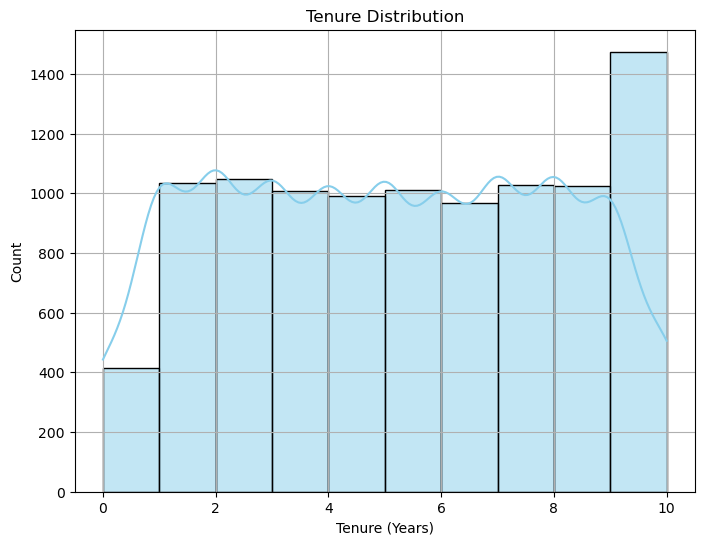

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure', bins=10, kde=True, color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## Pair Plot


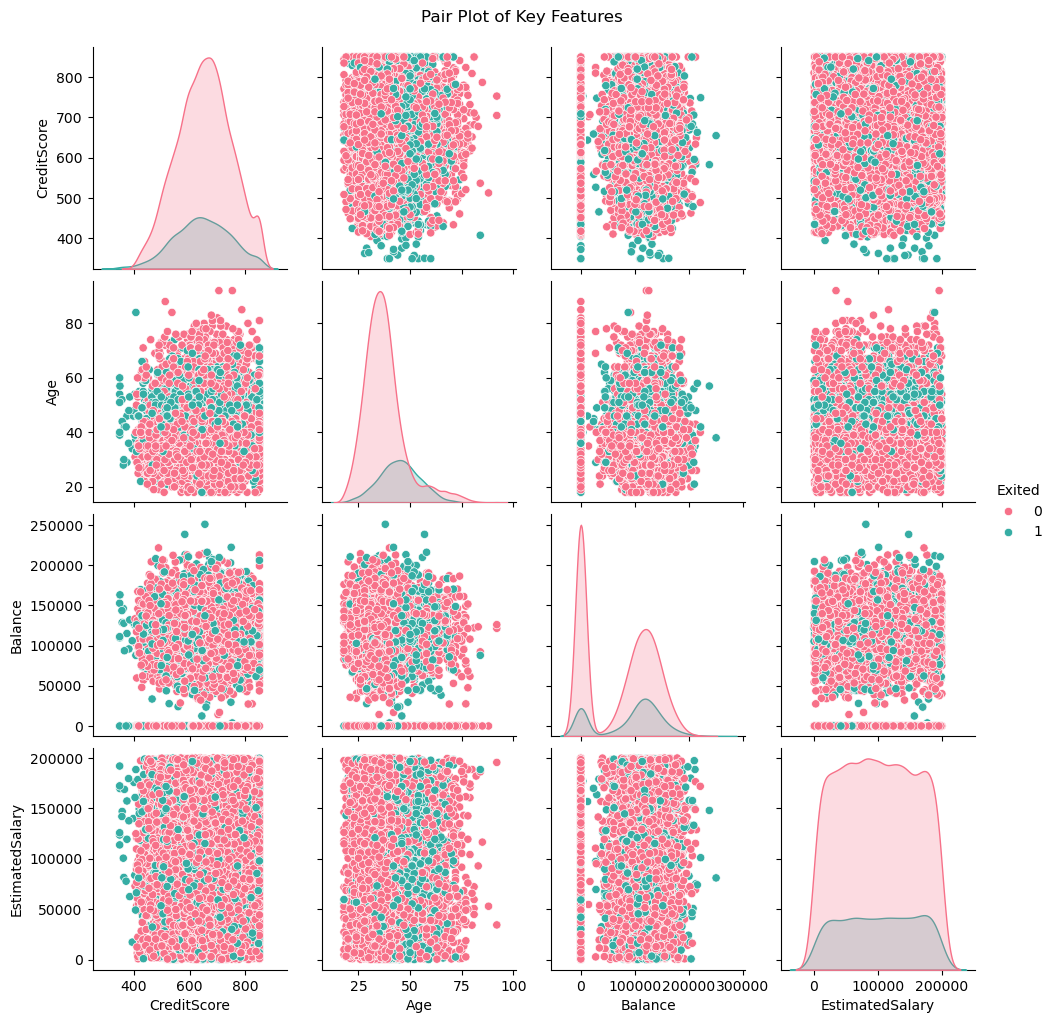

In [28]:
# Select key features for pairplot
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']

sns.pairplot(df[selected_features], hue='Exited', palette='husl')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


## 3D Scatter Plot

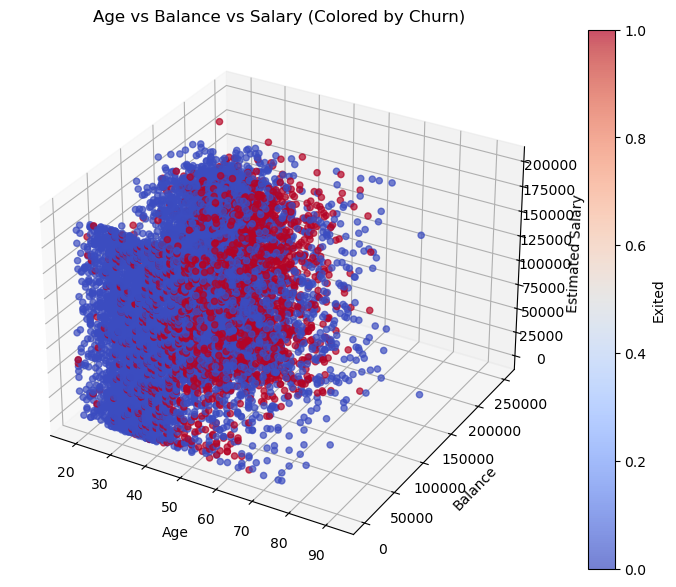

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Age'], df['Balance'], df['EstimatedSalary'],
                c=df['Exited'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('Age vs Balance vs Salary (Colored by Churn)')
plt.colorbar(sc, label='Exited')
plt.show()


## Stacked Bar Chart

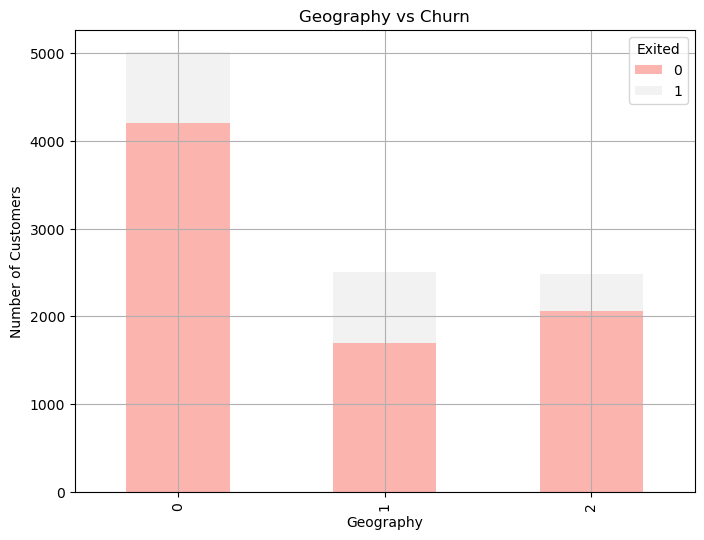

In [32]:
# Prepare stacked data
geo_churn = pd.crosstab(df['Geography'], df['Exited'])

geo_churn.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8, 6))
plt.title('Geography vs Churn')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited')
plt.grid(True)
plt.show()


## Grouped heatmap

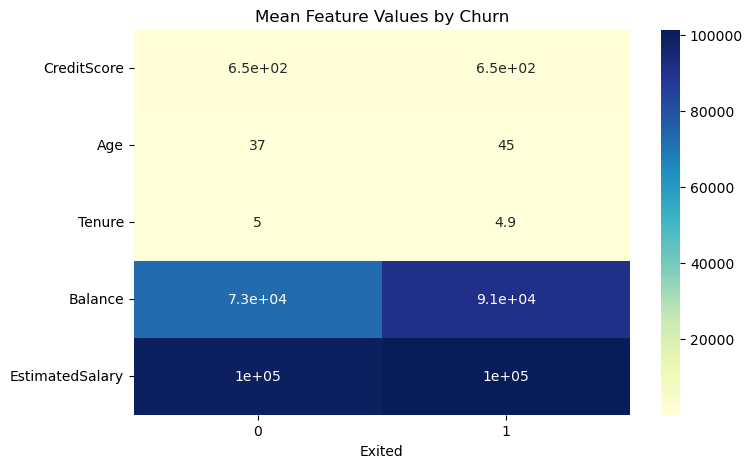

In [34]:
grouped = df.groupby('Exited')[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].mean()

plt.figure(figsize=(8, 5))
sns.heatmap(grouped.T, annot=True, cmap='YlGnBu')
plt.title('Mean Feature Values by Churn')
plt.show()


## Count Plot

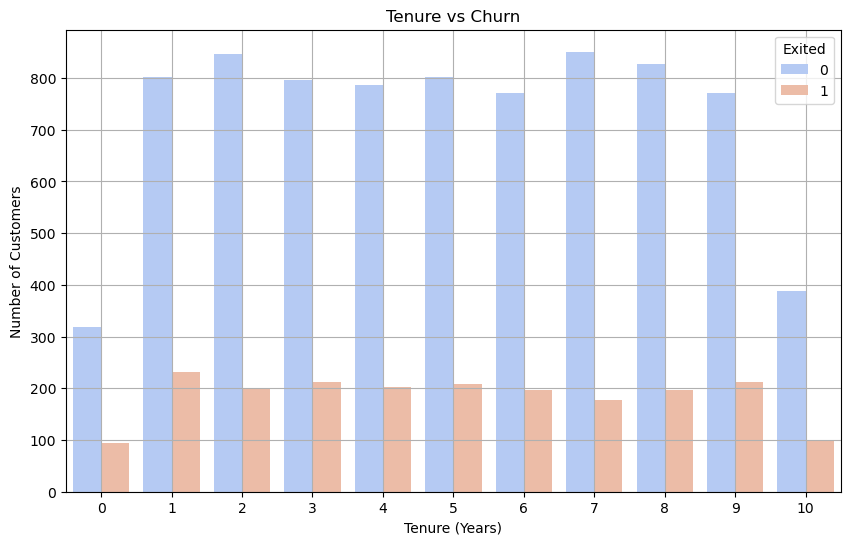

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure', hue='Exited', palette='coolwarm')
plt.title('Tenure vs Churn')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


## Strip Plot 

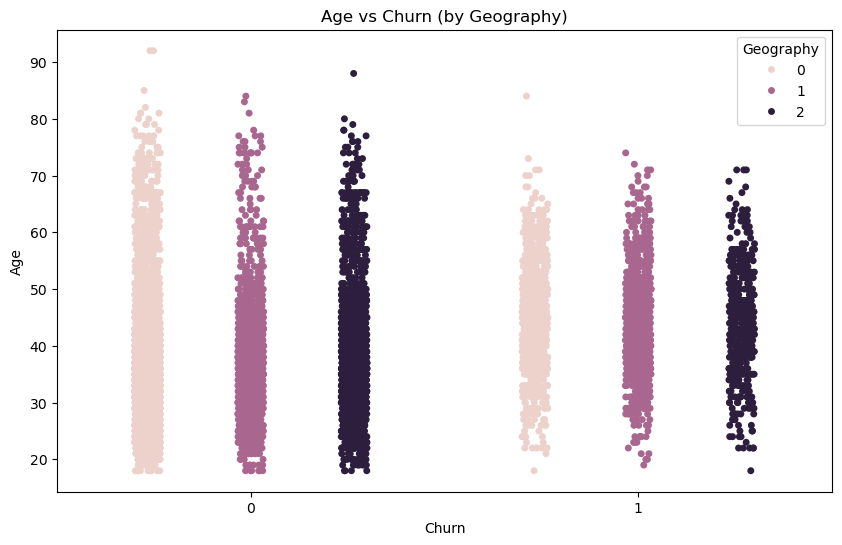

In [38]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Exited', y='Age', hue='Geography', jitter=True, dodge=True)
plt.title('Age vs Churn (by Geography)')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.legend(title='Geography')
plt.show()


# Machine Learning

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest
[[1553   54]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [41]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[1547   60]
 [ 208  185]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [42]:
print(" Random Forest Accuracy       :", accuracy_score(y_test, y_pred_rf))
print(" Gradient Boosting Accuracy   :", accuracy_score(y_test, y_pred_gb))

 Random Forest Accuracy       : 0.8675
 Gradient Boosting Accuracy   : 0.866


# Key Insights

* Churn Rate: About 20% of customers have exited.

* High Churn in Germany: Customers from Germany churn the most.

* Age Matters: Older customers (above 50) are more likely to churn.

* Tenure Impact: Very new and very old customers show higher churn.
    
* Low Engagement Risk: Customers with only 1 product tend to churn more.

* Balance Effect: High-balance customers are more prone to churn.

* Gender & Salary: No strong impact on churn.

* Credit Card: Minimal effect on customer retention.

